**Eng: Hanan Zuheer Mohamad Abuzainab**

# **Real-world Data Wrangling** (A Comparative Analysis of YouTube and TikTok)

## Introduction
**GOAL**  : Study the types of content and influencers that attract people on different social media platforms. I will wrangle two datasets: one containing information about the **top 1000 YouTube channels**, detailing metrics such as subscribers, video views, and video counts, and another about the **top 1000 TikTok influencers**, including metrics like subscribers, views, likes, and comments. This study will help identify the most engaging content and influential figures on both platforms.

## 1. Gather data

 extract data using two different data gathering methods.

### **1.1.** Problem Statement
In this project, we will be wrangling and analyzing the **youtube dataset ** and the **tiktok dataset ** and the following questions will be investigated :

**Questions:**

1. What is the relationship between the number of videos posted and the number of subscribers and views?<br>
   <br>
2. What is the average (views) for different categories?<br>
--------------------------------

3. Which countries have the highest number of top-ranked influencers?<br>
<br>
4. Which topics of influence are most popular among influencers?<br>
--------------------------------

5.Which category has the highest average followers across both platforms?<br>
<br>
6. Who are the top 10 influencers by follower count?<br>
<br>
7. Are there any influencers who appear in the top ranks on both platforms?<br>

### **1.2.** Gather at least two datasets using two different data gathering methods



In [1]:
# importing what i need:
import pandas as pn
import numpy as np
import requests
from bs4 import BeautifulSoup
import zipfile
import os

#### **Dataset 1**

Type: html File

Method: The dataset was collected through web scraping using Python scripts and libraries to extract youtube channels information from "https://us.youtubers.me/global/all/top-1000-most-subscribed-youtube-channels" source.

Dataset variables:

| Variable       | Description                                                                                    |
|----------------|------------------------------------------------------------------------------------------------|
| Rank           | The position of the YouTube channel in the top 1000 list based on subscribers.                 |
| Youtuber       | The name of the YouTube channel or the person/brand managing it.                                |
| Subscribers    | The number of people subscribed to the YouTube channel.                                         |
| Video Views    | The total number of views across all videos on the channel.                                      |
| Video Count    | The total number of videos uploaded by the channel.                                              |
| Category       | The genre or type of content the channel produces (e.g., entertainment, education, gaming).     |



In [2]:
    #url of the wesite:
    link="https://us.youtubers.me/global/all/top-1000-most-subscribed-youtube-channels"
    top_th=requests.get(link)

#Raise an exception if we made a request resulting in an error
top_th.raise_for_status()
    soup=BeautifulSoup(top_th.text,"html")
    #we want just the table part of the website
    table=soup.find_all("table",{'class':'top-charts'})
    #making list of all channels info in the table 
    all_channels=table[0].find_all('tr')
    #make list of columns names which is the first element in the all_channels list
    headers=all_channels[0]
    titles=[]
    #editing the titles list :
    for i in headers:
        titles.append(i.text)
        #titles this list contain the name of columns 
    titles = titles[1:-1]

    #rmove header from list(first element) we dont need it anymore
    all_channels=all_channels[1:]
    #number of channels
    number_of_channels=len(all_channels)
    # in this dictionary we gonna store all the data we scrape 
    dict=[]
    #get data of each column
    rank=[]
    youtuber=[]
    subscribers=[]
    video_views=[]
    video_count=[]
    category=[]
# gather data from all_channels list and classify them into columns
    for c in range(number_of_channels):
        rank.append(all_channels[c].contents[1].text.strip())
        youtuber.append(all_channels[c].contents[3].text.strip())
        subscribers.append(all_channels[c].contents[5].text.strip())
        video_views.append(all_channels[c].contents[7].text.strip())
        video_count.append(all_channels[c].contents[9].text.strip())
        category.append(all_channels[c].contents[11].text.strip())
        #store data in the dict
    dict={titles[0]:rank,titles[1]:youtuber,titles[2]:subscribers,titles[3]:video_views,titles[4]:video_count,titles[5]:category}
# convert dict to dataframe
    df = pn.DataFrame(dict)
    
    
   # convert dataframe to csv file and store it in the same dirictory of nootbook
    df.to_csv('youtube.csv', index=False)
    # load data from csv file into (dataset1) datafram
    dataset1=pn.read_csv(r'youtube.csv')
  # Display the first few rows to verify
    dataset1.head(10)




rank                    Youtuber  subscribers      video views video count  \
0     1                     MrBeast  291,000,000   53,092,894,732         803   
1     2                    T-Series  268,000,000  259,258,211,055      21,280   
2     3              YouTube Movies  181,000,000                0           0   
3     4  Cocomelon - Nursery Rhymes  177,000,000  182,880,824,642       1,194   
4     5                   SET India  174,000,000  165,774,163,058     140,318   
5     6         â¿ Kids Diana Show  123,000,000  104,040,819,679       1,231   
6     7                       Music  121,000,000                0           0   
7     8               Vlad and Niki  120,000,000   91,759,608,217         731   
8     9                 Like Nastya  117,000,000  101,603,814,547         887   
9    10                   PewDiePie  111,000,000   29,328,492,619       4,770   

           category  
0     Entertainment  
1             Music  
2  Film & Animation  
3         Education  
4             Shows  
5    People & Blogs  
6               NaN  
7     Entertainment  
8    People & Blogs  
9            Gaming

#### Dataset 2

Type: CSV File.

Method: *The dataset was manually collected and  formatted in csv file  from https://starngage.com/plus/en-us/influencer/ranking/tiktok source.

Dataset variables:

| Variable   | Description                                                                                         |
|----------|-----------------------------------------------------------------------------------------------------|
| Rank     | The numerical ranking of the influencer based on their followers.                                     |
| Name     | The full name of the influencer.                                                                     |
| Username | The username or handle of the influencer on the platform.                                             |
| Followers | The number of followers the influencer has, represented in millions (M).                              |
| Country  | The country where the influencer is based or associated with.     
| Topic of Influence | The primary subject or industry the influencer is known for and discusses frequently. |


In [3]:

# Load CSV file into a Pandas DataFrame
dataset2= pn.read_csv("top_1000_tiktokers.csv",encoding='latin-1')

 # Display the first few rows to verify
dataset2.head()



rank           Name      Username Followers        Country  \
0     1   Khabane lame   @khaby.lame    161.9M          Italy   
1     2   Bella Poarch  @bellapoarch     92.6M  United States   
2     3  AddisonâRae    @addisonre     88.5M  United States   
3     4        MrBeast      @mrbeast     85.4M            NaN   
4     5      Zach King     @zachking     78.1M  United States   

        Topic of Influence  
0                    Funny  
1  Entertainment and Music  
2     Beauty and Self Care  
3  Entertainment and Music  
4  Entertainment and Music

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

In [4]:
#fixing leading sapce in the Topic of Influence column before start assessing
dataset2["Topic of Influence"]= dataset2["Topic of Influence"].str.strip()

## 1. Identify data quality issues in the youtube data

### Quality Issue 1: Completness
by taking multiple sample and look by eyes i observe multiple things

In [5]:
#FILL IN - Inspecting the dataframe visually
dataset1.sample(20)

rank          Youtuber subscribers     video views video count  \
332   333     WatchMojo.com  25,400,000  16,885,536,332      27,245   
996   997     Reaction Time  14,600,000   4,473,584,772       1,741   
700   701         SEVENGERS  17,400,000  13,997,044,137       1,181   
84     85    MrBeast Gaming  44,300,000   7,944,702,679         141   
624   625        KatieAngel  18,600,000   4,080,982,553         942   
883   884      FAMILY BOOMS  15,400,000  15,163,123,012       1,430   
522   523          Skrillex  20,300,000   6,883,399,569         250   
645   646               UFC  18,300,000   8,119,501,662      17,202   
570   571       Matt Larose  19,400,000   8,208,928,645         193   
258   259         dednahype  28,700,000  28,600,894,682       3,143   
757   758       Volga Video  16,600,000   8,970,953,252       6,196   
218   219        MaviGadget  31,600,000  28,568,756,058       5,057   
861   862        Zee Telugu  15,600,000  12,354,908,625     157,534   
33     34        Wave Music  62,200,000  42,873,251,322      20,213   
808   809              Live  16,100,000               0           0   
992   993       SHoNgxBÐ¾Ng  14,600,000   2,511,237,122         724   
440   441   Tekashi 6ix9ine  22,200,000   6,349,928,074          61   
557   558      DEV Ke Facts  19,600,000   4,835,581,116         494   
945   946        TheRichest  14,900,000   2,739,256,069       2,379   
183   184  KHANDESHI MOVIES  33,800,000  11,734,701,965         235   

             category  
332             Music  
996     Entertainment  
700            Comedy  
84             Gaming  
624    People & Blogs  
883     Entertainment  
522             Music  
645            Sports  
570            Sports  
258            Comedy  
757  Film & Animation  
218     Entertainment  
861     Entertainment  
33              Music  
808               NaN  
992            Gaming  
440    People & Blogs  
557               NaN  
945         Education  
183            Comedy

there is a category with nan values

In [6]:
#FILL IN - Inspecting the dataframe programmatically
print(f"number of null values in the category column is {sum(dataset1.category.isnull())}")

number of null values in the category column is 43


we abserve that there is 43 null values in the category column 

**Issue and justification**: *Presence of Null Values in the Category Column*<br>
> Null values in the category column can lead to incomplete analysis, bias, degraded model performance, and indicate data integrity issues. Addressing these null values is essential to ensure the accuracy and completeness of the dataset.

### Quality Issue 2: validity

In [7]:
#FILL IN - Inspecting the dataframe visually
dataset1.describe()

rank
count  1000.000000
mean    500.500000
std     288.819436
min       1.000000
25%     250.750000
50%     500.500000
75%     750.250000
max    1000.000000

The describe() method provides descriptive statistics only for the rank column, indicating that other numerical columns like subscribers, video views, and video count are not recognized as numerical data types

In [8]:
#FILL IN - Inspecting the dataframe programmatically
dataset1.dtypes

rank            int64
Youtuber       object
subscribers    object
video views    object
video count    object
category       object
dtype: object

As observed, columns like subscribers, video views, and video count are of type object instead of an appropriate numerical type like int64 or float64.

**Issue and justification**: *Data Type Validity*<br>
*Columns like subscribers, video views, and video count should be numeric but are currently of type object.*

> Converting subscribers, video views, and video count to numeric data types ensures accurate analysis, proper handling, and validation of numerical data, and improves performance by enabling efficient numerical operations and statistical analyses.

### Quality Issue 3: consistency

by showing multiple sample of channels names i observe that there is strange characters in the channels names and that affect the consistency of data so i shuuld fix or remove them

In [9]:
#Inspecting the dataframe visually
dataset1.sample(2,random_state=88)

rank             Youtuber  subscribers      video views video count  \
5       6  â¿ Kids Diana Show  123,000,000  104,040,819,679       1,231   
959   960        Sonyakisa8 TT   14,800,000   10,063,367,069         259   

           category  
5    People & Blogs  
959  Pets & Animals

In [10]:
#list of some strange characters that i notice in diffirent samples 
chars_to_search = ['','Ø','¼','Ñ','§','°','¾']

i want to store all channels with strange name in one datafram to remove them later from the original data fram

In [11]:
#Inspecting the dataframe programmatically
filtered_rows = []

for char in chars_to_search:
    filtered_rows.append(df[df['Youtuber'].str.contains(char)])
filtered_rows
filtered_df = pn.concat(filtered_rows)
filtered_df=filtered_df.drop_duplicates()
filtered_df

rank                                           Youtuber subscribers  \
63     64                         ÐÐ°ÑÐ° Ð¸ ÐÐµÐ´Ð²ÐµÐ´Ñ  48,700,000   
208   209                                  Sagawa /ããã  31,800,000   
230   231        Boram Tube Vlog [ë³´ëíë¸ ë¸ì´ë¡ê·¸]  30,700,000   
542   543                             ÐÐ¾Ð·Ð½Ð°Ð²Ð°ÑÐµÐ»Ñ  19,900,000   
569   570    AMARINTV : à¸­à¸¡à¸£à¸´à¸à¸à¸£à¹à¸à¸µà¸§à¸µ  19,400,000   
587   588              RsiamMusic : à¸­à¸²à¸£à¹à¸ªà¸¢à¸²à¸¡  19,200,000   
891   892                                    èèä¸èæ¡  15,400,000   
902   903                       ÐÐ°ÑÐ° ÑÐ° ÐÐµÐ´Ð¼ÑÐ´Ñ  15,300,000   
999  1000  Boram Tube ToysReview [ë³´ëíë¸ í ì´ë¦¬ë·°]  14,600,000   
80     81                                     shfa2 - Ø´ÙØ§  44,700,000   
217   218      ÙÙØ§Ø© Ø·ÙÙØ± Ø§ÙØ¬ÙØ© | toyoraljanahtv  31,600,000   
376   377               Ø·Ø§Ø±Ù Ø§ÙØ­ÙØ¨Ù tarik alhalapi  24,000,000   
484   485  Ø´Ø¨ÙØ© Ø§ÙØ¹Ø§Ø¨ Ø§ÙØ¹Ø±Ø¨ | Arab Games Ne...  21,100,000   
674   675                        Ø§ÙÙØ±ÙÙ
Ø§Ø³ - Al-Remas  17,800,000   
682   683                               Ù
Ø§Ø´Ø§ Ù Ø§ÙØ¯Ø¨  17,600,000   
714   715          AlJazeera Arabic  ÙÙØ§Ø© Ø§ÙØ¬Ø²ÙØ±Ø©  17,200,000   
809   810          Ø­ÙØ±Ù Ø¥Ø¨Ø¯Ø§Ø¹ÙØ© ÙÙ 5 Ø¯ÙØ§Ø¦Ù  16,100,000   
863   864              Mohamed Ramadan I Ù
Ø­Ù
Ø¯ Ø±Ù
Ø¶Ø§Ù  15,600,000   
868   869                           AlArabiya Ø§ÙØ¹Ø±Ø¨ÙØ©  15,600,000   
903   904                 Saad Lamjarred | Ø³Ø¹Ø¯ ÙÙ
Ø¬Ø±Ø¯  15,300,000   
933   934                                      Ø£ØªØ±Ù/Atro  15,000,000   
973   974                            Ø­ÙØ§Ø¦Ù ÙØ£Ø³Ø±Ø§Ø±  14,700,000   
981   982                                Ø§Ù
 Ø³ÙÙ Om sayf  14,700,000   
326   327                                        netd mÃ¼zik  25,500,000   
346   347                               1theK (ìëì¼ì´)  24,800,000   
662   663        spider-maaaaaaan / ã¹ãã¤ãã¼ã¡ã¼ã³  17,900,000   
673   674                    ÐÐ¸Ð¼Ð° ÐÐ°ÑÐ»ÐµÐ½Ð½Ð¸ÐºÐ¾Ð²  17,800,000   
825   826                                       ÐÐ¾Ð¼Ð¿Ð¾Ñ  16,000,000   
900   901                                  Ð¢ÑÑÐ¼ Ð¢ÑÑÐ¼  15,300,000   
913   914                                 ÐÑÐ½Ð¾Ð¼Ð¾ÑÐ¸Ðº  15,200,000   
568   569                                ÐÐ¸ÑÐ¾ÑÐºÐ° Ð¢Ð  19,400,000   
738   739                           ÐÐ»Ð°Ð´ Ð¸ ÐÐ¸ÐºÐ¸ÑÐ°  16,800,000   
859   860                             BIBO Ð¸ ÐÐ³ÑÑÑÐºÐ¸  15,600,000   
304   305                                 MarÃ­lia MendonÃ§a  26,500,000   
828   829                                     Anh Cá»§ Cáº£i  15,900,000   
62     63  à¤à¤à¤¾à¤°à¥à¤¯ à¤ªà¥à¤°à¤¶à¤¾à¤¨à¥à¤¤ - ...  49,600,000   
193   194          à¤µà¥à¤²à¤¾à¤¦ à¤à¤° à¤¨à¤¿à¤à¤¿à¤¤à¤¾  32,900,000   
609   610                                         HUBAíë°  18,700,000   
810   811                                  STAR à¤­à¤¾à¤°à¤¤  16,100,000   
745   746  Oneindia Hindi | à¤µà¤¨à¤à¤à¤¡à¤¿à¤¯à¤¾ à¤¹à...  16,800,000   
992   993                                        SHoNgxBÐ¾Ng  14,600,000   

        video views video count          category  
63   40,508,415,727       1,728  Film & Animation  
208  25,362,851,488       8,557     Entertainment  
230  13,781,155,878         233     Entertainment  
542  10,341,420,687         522     Entertainment  
569   6,680,112,923      75,990     Entertainment  
587  12,213,005,366       3,575             Music  
891   8,373,624,684       2,153    People & Blogs  
902   6,660,071,961       1,466             Shows  
999   5,078,907,224         646    People & Blogs  
80   27,838,984,319       1,770    People & Blogs  
217  29,036,441,935       3,344     Entertainment  
376  13,604,285,573       1,164     Entertainment  
484   9,563,784,576       7,281            Gaming  
674  11,156,667,920       2,277             Music  
682   9,612,674,602       1,238 

**Issue and justification**: *Consistency of Channel Names*<br>
>Strange characters in channel names affect the consistency and readability of the data. This can lead to difficulties in data processing, merging, and analysis. Fixing or removing these characters ensures the data is clean and consistent, facilitating accurate analysis and reporting.


## 2. Identify data structural issues in the youtube data

During our data tidiness investigation, we will look at the application of the following rules:

- Every column is a variable.
- Every row is an observation.
- Every cell is a single value.

We can see our dataset is **clearly formatted with the column names accepted as the header**, **each row consisting of a single observation**, and **the cells in the dataset being single values**. But looking into the dataset, we can notice some issues. Below, you will find issue related to data tidiness and investigate them programmatically below.


In [12]:
dataset1["category"].value_counts()

category
Entertainment            268
Music                    172
People & Blogs           152
Gaming                    93
Comedy                    70
Film & Animation          46
Education                 41
News & Politics           28
Howto & Style             28
Sports                    17
Science & Technology      15
Shows                     13
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Name: count, dtype: int64

### Tidiness Issue: unnecessary values
Categories with very few entries (like "Trailers", "Nonprofits & Activism", "Movies", "Autos & Vehicles") may need to be merged with other similar categories to simplify the analysis.

In [13]:
dataset1[dataset1["category"]=="Nonprofits & Activism"]

rank              Youtuber subscribers    video views video count  \
113   114            TEDx Talks  41,000,000  7,918,138,555     218,179   
438   439  Bispo Bruno Leonardo  22,400,000  5,581,943,618       6,303   

                  category  
113  Nonprofits & Activism  
438  Nonprofits & Activism

In [14]:
dataset1[dataset1["category"]=="Movies"]

rank             Youtuber subscribers     video views video count  \
192   193        Aditya Movies  33,000,000  12,755,263,229       7,848   
301   302  Ultra Movie Parlour  26,500,000   5,440,757,806       1,984   

    category  
192   Movies  
301   Movies

In [15]:
dataset1[dataset1["category"]=="Autos & Vehicles"]

rank          Youtuber subscribers     video views video count  \
347   348      DUDU e CAROL  24,700,000  12,503,659,420       3,044   
565   566  Supercar Blondie  19,500,000   9,238,515,533       1,202   

             category  
347  Autos & Vehicles  
565  Autos & Vehicles

In [16]:
dataset1[dataset1["category"]=="Trailers"]

rank         Youtuber subscribers     video views video count  category
77     78     Ishtar Music  45,500,000  19,474,774,870       4,628  Trailers
124   125  Ultra Bollywood  40,200,000  16,094,340,716       9,416  Trailers

we have just two channels from the previous categories

In [17]:
#FILL IN - Inspecting the dataframe programmatically
category_counts = dataset1['category'].value_counts()
print(category_counts)

category
Entertainment            268
Music                    172
People & Blogs           152
Gaming                    93
Comedy                    70
Film & Animation          46
Education                 41
News & Politics           28
Howto & Style             28
Sports                    17
Science & Technology      15
Shows                     13
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Name: count, dtype: int64


In [18]:
#store all categories with low freq togethor under one name
low_freq_categories = category_counts[category_counts < 3].index
print(low_freq_categories)

Index(['Trailers', 'Nonprofits & Activism', 'Movies', 'Autos & Vehicles'], dtype='object', name='category')


**Issue and justification**: *Unnecessary Values in Categories*
> Merging categories with very few entries simplifies the dataset and analysis, consolidates infrequent categories into a more meaningful group, and reduces noise, enhancing the clarity of the analysis by focusing on more prominent categories.

## 2.1 Identify data quality issues in the tiktok data

### Quality Issue 1: Completness
by taking multiple sample and look by eyes i observe that data in country and topic of influnce columns is lacking there is nan vlaues and also - which also mean nan vlaues

In [19]:
#Inspecting the dataframe visually
dataset2.sample(10,random_state=200)

rank                           Name           Username Followers  \
303    304                    Nickelodeon       @nickelodeon     12.9M   
1018   992                  Sergio Jurado    @sergiojuradoyt      6.7M   
166    167                            JLO               @jlo     17.5M   
555    556                   Jason Thores       @jasonthores      9.6M   
544    545                 Polina Dubkova         @dubkovapo      9.7M   
1012   986            Kasheeâs official  @kashees.official      6.7M   
761    762  Ð¿ÑÐ¾ÑÑÐ¾ ÑÐµÑÐµÐ¶Ð°ð¹       @serezha.omg      7.9M   
657    658                    Ayden Mekus        @aydenmekus      8.7M   
560    561                 Sheena Melwani     @sheenamelwani      9.5M   
251    252                    Elaine Haro   @elaineharomusic       14M   

            Country       Topic of Influence  
303   United States                      NaN  
1018              -                        -  
166   United States  Entertainment and Music  
555          Mexico  Entertainment and Music  
544             NaN                      NaN  
1012            NaN  Fashion and Accessories  
761               -                        -  
657               -                      NaN  
560             NaN  Entertainment and Music  
251             NaN                      NaN

In [20]:
#FILL IN - Inspecting the dataframe programmatically
dataset2.isnull().sum()

rank                    0
Name                    0
Username                0
Followers               0
Country               372
Topic of Influence    281
dtype: int64

In [21]:
print(f"Number of values with a dash in the 'Country' column is {(dataset2['Country'] == '-').sum()}")
print(f"Number of values with a dash in the 'Topic of Influence' column is {(dataset2['Topic of Influence'] == '-').sum()}")

Number of values with a dash in the 'Country' column is 328
Number of values with a dash in the 'Topic of Influence' column is 150


* **Missing Values**: There are 372 null values in the 'Country' column and 281 null values in the 'Topic of Influence' column.
* **Dash Values**: Additionally, there are 329 entries marked with a dash ('-') in the 'Country' column and 150 entries in the 'Topic of Influence' column.

**Issue and justification**: *Incomplete Data in 'Country' and 'Topic of Influence' Columns*
>  Missing and dash values in the 'Country' and 'Topic of Influence' columns (372 null and 329 dash in 'Country', 280 null and 150 dash in 'Topic of Influence') compromise data completeness, impacting the ability to conduct comprehensive analysis and ensure data integrity.


### Quality Issue 2: validity

In [22]:
#FILL IN - Inspecting the dataframe visually
dataset2["Followers"].head()

0    161.9M
1     92.6M
2     88.5M
3     85.4M
4     78.1M
Name: Followers, dtype: object

Followers column represent The number of followers the influencer has in millions (M) and it seem to be string instead of number datatype because there is a character 'M' so its better to convert it to make it useful in analysis and visualization later...

In [23]:
#FILL IN - Inspecting the dataframe programmatically
dataset2.dtypes

rank                   int64
Name                  object
Username              object
Followers             object
Country               object
Topic of Influence    object
dtype: object

as we can see that the datatype of Followers attribute is object which means String 

**Issue and justification**: * Incorrect Data Type in 'Followers' Column*
> The 'Followers' column in the dataset contains values representing the number of followers in millions (M) as strings (e.g., '161.9M'). This string format with the 'M' suffix makes it inappropriate for numerical operations and visualization. Converting this column to a numeric data type (e.g., float) will enable proper analysis and visualization, ensuring accurate insights into influencer reach and impact.

### Quality Issue 3: consistency

In [24]:
#FILL IN - Inspecting the dataframe visually
dataset2["Topic of Influence"].head(50)

0                       Funny
1     Entertainment and Music
2        Beauty and Self Care
3     Entertainment and Music
4     Entertainment and Music
5                         NaN
6                         NaN
7     Entertainment and Music
8                         NaN
9                         NaN
10    Entertainment and Music
11       Beauty and Self Care
12    Entertainment and Music
13                        NaN
14    Entertainment and Music
15    Entertainment and Music
16    Entertainment and Music
17                        NaN
18    Fashion and Accessories
19    Entertainment and Music
20    Entertainment and Music
21                     family
22                       Food
23                        NaN
24                        NaN
25    Entertainment and Music
26    Entertainment and Music
27    Entertainment and Music
28       Beauty and Self Care
29                        NaN
30    Entertainment and Music
31                        NaN
32    Entertainment and Music
33    Ente

there is a bit different in the name of categories of the same type such as (Fashion and Accessories// Beauty and Self Care) is almost the same meaning and can be associated into one category

In [25]:
#FILL IN - Inspecting the dataframe programmatically
dataset2["Topic of Influence"].value_counts()

Topic of Influence
Entertainment and Music                                          300
-                                                                150
Beauty and Self Care                                              39
Fashion and Accessories                                           32
Education                                                         19
Funny                                                             18
family                                                            16
Arts and Crafts                                                   15
Games                                                             15
Food                                                              14
Sports                                                            13
Acting and Drama                                                  13
Pets                                                              11
Music                                                              8
Animation and C

Merge categories that share similar themes or overlap in meaning

1. here are the ones that have the same neaning of "Entertainment":
    
* Funny
* Entertainment and Music
* Entertainment and Music Funny
* Entertainment and Music Finance Upskilling
* Animation and Cosplay Entertainment and Music
* Entertainment and Music Animation and Cosplay
* Entertainment and Music Acting and Drama
* family Entertainment and Music Food
* Education Entertainment and Music Careers
* Entertainment and Music Music
<br>
Combine related categories like  into a broader "Entertainment" category.  <br> 



2. categories that match or have similar meanings to "Beauty":
    
* Fashion and Accessories
* Beauty and Self Care
* Fashion and Accessories Beauty and Self Care Life and Society
* Beauty<br>
Combine related categories like  into a broader "Beauty" category.<<br>

3. here are the ones that have the same neaning of "Gaming":
* Video Gaming
* Games<br>
 categories that match or have similar meanings to "Gaming"<br>

4. "Animals"& "Pets"have similar meanings  :<br>
so i will combine them into "Pets & Animals" category

5. "Food and Drink" & "Food" means "Food" : <br>
so i will combine them into "Food" category

6. 'Family' and 'family' is the same: <br>
so i will combine them into "Family" category

7. 'Finance'    'Business and Finance'   'Funny Business and Finance'  all the same: <br>
i will combine them into "Business and Finance" category

8. 'Product Education'  and 'Education' is almost the same 
i will combine them into "Education" category


**Issue and justification**: *Inconsistent and Overlapping Category Names*
> The dataset shows inconsistencies in labeling categories within the 'Topic of Influence' column due to varying naming conventions and overlapping definitions among categories like "Entertainment and Music", "Beauty and Self Care", and "Gaming". These discrepancies can hinder data analysis and interpretation, potentially introducing errors or misinterpretations in insights derived from the data. Standardizing and merging similar categories into broader groups enhances dataset clarity and usability, leading to more precise and insightful analyses.

## 2.2 Identify data structural issues in the tiktok data

During our data tidiness investigation, we will look at the application of the following rules:

- Every column is a variable.
- Every row is an observation.
- Every cell is a single value.

We can see our dataset is **clearly formatted with the column names accepted as the header**, **each row consisting of a single observation**, and **the cells in the dataset being single values**. But looking into the dataset, we can notice some issues. Below, you will find issue related to data tidiness and investigate them programmatically below.

### Tidiness Issue 1: unnecessary variable


In [26]:
#FILL IN - Inspecting the dataframe visually 
dataset2[['Name','Username']].sample(10,random_state=12)

Name            Username
843          Mason Adams (Glasco)          @maseplace
760                          noah       @noahschnacky
861                  Tracy Joseph           @tracy.oj
3                         MrBeast            @mrbeast
831       X I M E P O N C H â¡Ì          @ximeponch
402  ð±ð¹Ø§ÙÙÙØµØ±ð¹ð±        @1_alkaisr_1
738               Kaung Min Khant         @mgkhant413
39                Devon Rodriguez  @devonrodriguezart
386               TwinsFromRussia    @twinsfromrussia
866    #QualityKingð³ï¸âð          @enochtrue

I noticed that there are many strange characters in the "Name" column. Since we have the "Username" column, which is sufficient for searching and finding accounts on TikTok, it would be better to delete the "Name" column.

**Issue and justification**: *unnecessary Information in the "Name" Column*
>The dataset includes a "Name" column that contains various strange characters. Since TikTok usernames in the "Username" column serve the purpose of uniquely identifying accounts, the "Name" column is redundant and adds unnecessary complexity to the dataset

In [27]:
#FILL IN - Inspecting the dataframe  programmatically


## 3. Clean data
Clean the data to solve the issues corresponding to data quality and tidiness found in the assessing step.

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.



In [28]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
#youtube dataset
dataset1_copy = dataset1.copy()
#tiktok dataset
dataset2_copy = dataset2.copy()


## 1. Cleaning data quality issues in the youtube data

 ### **Quality Issue 1: Completness**

In [29]:
#null values in the dataset2
dataset1_copy.isna().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       43
dtype: int64

43 value is a few number comparing to 1000 so drop the rows is the best solution

In [30]:
# FILL IN - Apply the cleaning strategy
dataset1_copy=dataset1_copy.dropna()

In [31]:
# FILL IN - Validate the cleaning was successful
dataset1_copy.isna().sum()

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
dtype: int64

**Justification**: 
> *Dropping rows with missing values ensures that the dataset is complete, which is crucial for accurate analysis and interpretation. This step eliminates any potential issues that missing data might cause during the analysis process.*

### Quality Issue 2: validity

In [32]:
#FILL IN - Apply the cleaning strategy
# Clean the data by converting relevant columns to numeric data types
# First, remove any non-numeric characters that might be present in the columns
dataset1_copy['subscribers'] = dataset1_copy['subscribers'].str.replace(',', '').astype(float)
dataset1_copy['video views'] = dataset1_copy['video views'].str.replace(',', '').astype(float)
dataset1_copy['video count'] = dataset1_copy['video count'].str.replace(',', '').astype(float)

In [33]:
#FILL IN - Validate the cleaning was successful
dataset1_copy.dtypes

rank             int64
Youtuber        object
subscribers    float64
video views    float64
video count    float64
category        object
dtype: object

**Justification**:
> *Converting subscribers, video views, and video count to numeric data types ensures that these columns are treated as numerical values, which is essential for accurate analysis and statistical operations.*

### Quality Issue 3:consistency

In [34]:
#length before removing channels with strange characters
original_len=len(dataset1_copy)
print(f"length befor removing channels with strange characters  {original_len}")

length befor removing channels with strange characters  957


In [35]:
#FILL IN - Apply the cleaning strategy
for char in chars_to_search:
    dataset1_copy = dataset1_copy[~dataset1_copy['Youtuber'].str.contains(char, na=False)]


In [36]:
dataset1_copy.sample(10)

rank          Youtuber  subscribers   video views  video count  \
998   999     TV Ana Emilia   14600000.0  4.978035e+09        791.0   
517   518    albert_cancook   20400000.0  1.484931e+10        715.0   
190   191  Marta and Rustam   33400000.0  2.794314e+10       1113.0   
463   464    Yudist Ardhana   21700000.0  8.723590e+09       4020.0   
81     82  whinderssonnunes   44700000.0  4.525190e+09        783.0   
330   331       Las Ratitas   25400000.0  9.902378e+09        225.0   
953   954   Canal Nostalgia   14900000.0  1.557177e+09        445.0   
170   171   DisneyMusicVEVO   34900000.0  3.218978e+10       2361.0   
921   922      Oyuncak AvÄ±   15200000.0  4.253526e+09        241.0   
332   333     WatchMojo.com   25400000.0  1.688554e+10      27245.0   

           category  
998  People & Blogs  
517   Howto & Style  
190          Comedy  
463   Entertainment  
81           Comedy  
330  People & Blogs  
953   Entertainment  
170           Music  
921   Entertainment  
332           Music

In [37]:
#FILL IN - Validate the cleaning was successful
#length after removing channels with strange characters
cleaned_len=len(dataset1_copy)
print(f"length after removing channels with strange characters {cleaned_len}")

length after removing channels with strange characters 919


**Justification**:The cleaning strategy involved removing rows where the Youtuber column contained specific characters (chars_to_search). After applying this strategy
> removing these rows ensures consistency in the 'Youtuber' names, eliminating strange characters that could affect data analysis and interpretation.*

> ### finding new Quality Issue while cleaning (Quality Issue - 4):validity

In [38]:
#Inspecting the dataframe visually
dataset1_copy['video count'].head()

0       803.0
1     21280.0
2         0.0
3      1194.0
4    140318.0
Name: video count, dtype: float64

In [39]:
#FILL IN - Inspecting the dataframe  programmatically
dataset1_copy.describe()

rank   subscribers   video views    video count
count  919.000000  9.190000e+02  9.190000e+02     919.000000
mean   495.045702  2.691034e+07  1.366982e+10   12722.570185
std    288.752120  2.046578e+07  1.650679e+10   43844.725054
min      1.000000  1.460000e+07  0.000000e+00       0.000000
25%    243.500000  1.680000e+07  5.376975e+09     522.000000
50%    491.000000  2.100000e+07  9.998055e+09    1301.000000
75%    747.500000  3.020000e+07  1.668734e+10    4122.000000
max    999.000000  2.910000e+08  2.592582e+11  387195.000000

Channels with a video count of 0 are considered outliers because it doesn't make sense for a channel to have subscribers and video views without any uploaded videos. Therefore, we should exclude these channels from the dataset to maintain data integrity and ensure accurate analysis.

**Issue and justification**: *Zero Video Count Outliers*
>Excluding channels with zero video count maintains dataset accuracy and integrity. It ensures that all channels in the analysis have at least one video, which is crucial for meaningful insights. Removing these outliers makes the dataset more reliable and the analysis more valid by avoiding misleading interpretations based on channels that shouldn't logically have followers or views without content.

### Cleaning  (Quality Issue - 4):validity

In [40]:
#FILL IN - Apply the cleaning strategy
# Remove rows where video count is zero
dataset1_copy = dataset1_copy[dataset1_copy['video count'] != 0]

In [41]:
# FILL IN - Validate the cleaning was successful
dataset1_copy.describe()

rank   subscribers   video views    video count
count  918.000000  9.180000e+02  9.180000e+02     918.000000
mean   495.581699  2.674248e+07  1.368471e+10   12736.429194
std    288.451730  1.983391e+07  1.650961e+10   43866.611060
min      1.000000  1.460000e+07  1.471000e+03       1.000000
25%    244.250000  1.680000e+07  5.384571e+09     526.000000
50%    491.500000  2.095000e+07  1.000979e+10    1301.000000
75%    747.750000  3.015000e+07  1.669214e+10    4122.500000
max    999.000000  2.910000e+08  2.592582e+11  387195.000000

**Justification**:
> *Justification: Removing channels with zero video count ensures that the dataset only includes active channels with content, which enhances the reliability and validity of the analysis*

### **Tidiness Issue 1: unnecessary values**

In [42]:
#FILL IN - Apply the cleaning strategy
dataset1_copy['category'] = dataset1_copy['category'].replace(low_freq_categories, 'Other')

In [43]:
#FILL IN - Validate the cleaning was successful
dataset1_copy["category"].value_counts()

category
Entertainment           257
Music                   166
People & Blogs          144
Gaming                   89
Comedy                   69
Film & Animation         44
Education                40
Howto & Style            26
News & Politics          26
Sports                   17
Science & Technology     15
Shows                    11
Other                     8
Pets & Animals            6
Name: count, dtype: int64

The "Other" category encompasses a total of 8 channels, each originally from categories with only 2 channels each.

**Justification**: 
> *Merging infrequently occurring categories into a single "Other" category simplifies the dataset, reduces noise, and ensures that analysis focuses on more prevalent categories. This approach maintains dataset consistency and enhances clarity in deriving insights from the data.*

## 2. Cleaning data quality issues in the tiktok data

### Quality Issue 1: Completness

In [44]:
# FILL IN - Apply the cleaning strategy
dataset2_copy['Country']=dataset2_copy['Country'].replace({'-':np.nan})
dataset2_copy['Topic of Influence']=dataset2_copy['Topic of Influence'].replace({'-':np.nan})

replacing '-' values with nan 

In [45]:
#FILL IN - Validate the cleaning was successful
dataset2_copy.loc[dataset2_copy['Country'].isin(['-'])]

Empty DataFrame
Columns: [rank, Name, Username, Followers, Country, Topic of Influence]
Index: []

In [46]:
#FILL IN - Validate the cleaning was successful
dataset2_copy.loc[dataset2_copy['Topic of Influence'].isin(['-'])]

Empty DataFrame
Columns: [rank, Name, Username, Followers, Country, Topic of Influence]
Index: []

In [47]:
#check the number of null values again in the tiktok dataset
dataset2_copy.isna().sum()

rank                    0
Name                    0
Username                0
Followers               0
Country               700
Topic of Influence    431
dtype: int64

 I cant drop  700 rows  so instead I will replace the null values, which are strings and unlikely to heavily influence the analysis, with 'Unknown' to maintain data integrity.

In [48]:
# FILL IN - Apply the cleaning strategy
dataset2_copy['Country'] = dataset2_copy['Country'].fillna('Unknown')
dataset2_copy['Topic of Influence'] = dataset2_copy['Topic of Influence'].fillna('Unknown')

In [49]:
#FILL IN - Validate the cleaning was successful
dataset2_copy.isna().sum()

rank                  0
Name                  0
Username              0
Followers             0
Country               0
Topic of Influence    0
dtype: int64

**Justification**: 
>*Replacing NaN values with 'Unknown' in 'Country' and 'Topic of Influence' ensures data completeness without compromising analysis. These string values are unlikely to significantly impact insights, maintaining dataset consistency while preserving potentially valuable data entries.
*

### Quality Issue 2: validity

In [50]:
# FILL IN - Apply the cleaning strategy
dataset2_copy['Followers']=dataset2_copy['Followers'].str.replace('M','').astype(float)
dataset2_copy['Followers']=dataset2_copy['Followers']*1000000

In [51]:
#FILL IN - Validate the cleaning was successful
print(f"the type of Followers column after converting is : {dataset2_copy['Followers'].dtypes}")
dataset2_copy.head(1)

the type of Followers column after converting is : float64


rank          Name     Username    Followers Country Topic of Influence
0     1  Khabane lame  @khaby.lame  161900000.0   Italy              Funny

**Justification**: 
> *By converting the 'Followers' column from a string (object) type to a float64 type, and multiplying by 1,000,000 to account for the 'M' suffix (representing millions), we ensure the data is in a numerical format suitable for analysis. This transformation allows for accurate numerical operations and meaningful visualizations, enabling insights into influencer reach and impact based on their follower counts.*"

### Quality Issue 3: consistency

In [52]:
# FILL IN - Apply the cleaning strategy
# Define mapping dictionaries for merging categories
category_mapping = {
    'Entertainment and Music': 'Entertainment',
    'Funny': 'Entertainment',
    'Entertainment and Music Funny': 'Entertainment',
    'Entertainment and Music Finance Upskilling': 'Entertainment',
    'Animation and Cosplay Entertainment and Music': 'Entertainment',
    'Entertainment and Music Animation and Cosplay': 'Entertainment',
    'Entertainment and Music Acting and Drama': 'Entertainment',
    'family Entertainment and Music Food': 'Entertainment',
    'Fashion and Accessories': 'Beauty',
    'Beauty and Self Care': 'Beauty',
    'Fashion and Accessories Beauty and Self Care Life and Society': 'Beauty',
    'Beauty': 'Beauty',
    'Video Gaming': 'Gaming',
    'Games': 'Gaming',
    'Animals': 'Pets & Animals',
    'Pets': 'Pets & Animals',
    'Food and Drink': 'Food',
    'Food': 'Food',
    'Family': 'Family',
    'family': 'Family',
    'Finance': 'Business and Finance',
    'Business and Finance': 'Business and Finance',
    'Funny Business and Finance': 'Business and Finance',
    'Product Education': 'Education',
    'Education': 'Education',
    'Education Entertainment and Music Careers': 'Entertainment',
    'Entertainment and Music Music': 'Entertainment'
}

# Apply the mapping to merge categories
dataset2_copy['Topic of Influence'] = dataset2_copy['Topic of Influence'].replace(category_mapping)




In [53]:

# Validate the cleaning was successful
print(dataset2_copy['Topic of Influence'].value_counts())

Topic of Influence
Unknown                  431
Entertainment            330
Beauty                    73
Education                 20
Family                    17
Gaming                    16
Pets & Animals            16
Food                      15
Arts and Crafts           15
Acting and Drama          13
Sports                    13
Business and Finance      10
Animation and Cosplay      8
Music                      8
Romance and Wedding        6
Product Showcase           6
Life and Society           5
Photography                5
Fitness and Health         5
Travel                     4
Nature                     3
Celebrity                  2
Home and Garden            2
DIY and Life Hacks         2
Auto and Vehicles          1
Careers                    1
Name: count, dtype: int64


**Justification**: 
> Standardizing category names by merging similar ones like "Family" and "family" into a unified category, and consolidating variations of "Finance" into "Business and Finance", improves dataset consistency and clarity. Similarly, combining "Product Education" with "Education" enhances analysis coherence, ensuring more accurate insights into influencer topics of influence and facilitating reliable data-driven decisions.*

### Tidiness Issue 1: unnecessary variable

In [54]:
# FILL IN - Apply the cleaning strategy
dataset2_copy.drop(columns=['Name'], inplace=True)

In [55]:
# Validate the cleaning was successful
dataset2_copy.columns

Index(['rank', 'Username', 'Followers', 'Country', 'Topic of Influence'], dtype='object')

**Justification**:
>Removing the 'Name' column addresses the tidiness issue of unnecessary variables in the dataset

In [56]:
dataset2_copy.head()

rank      Username    Followers        Country Topic of Influence
0     1   @khaby.lame  161900000.0          Italy      Entertainment
1     2  @bellapoarch   92600000.0  United States      Entertainment
2     3    @addisonre   88500000.0  United States             Beauty
3     4      @mrbeast   85400000.0        Unknown      Entertainment
4     5     @zachking   78100000.0  United States      Entertainment

## **Remove unnecessary variables and combine datasets**
steps:
* Step 1: Select Columns (Remove unnecessary variables)
* step 2: Add a New Column for Platform
* step 3: Rename Columns
* Step 4: Combine the Datasets
* Step 5: Sort by Followers and Update Rank

In [57]:
#FILL IN - Remove unnecessary variables and combine datasets
#youtube
youtube_columns_to_keep = ['rank', 'Youtuber', 'subscribers','category']
dataset1_new = dataset1_copy[youtube_columns_to_keep].copy()
dataset1_new['platform']='YouTube'
dataset1_new.rename(columns={'rank': 'Rank','Youtuber': 'Influencer', 'subscribers': 'Followers','category':'Category'}, inplace=True)
#tiktok
tiktok_columns_to_keep = ['rank', 'Username', 'Followers', 'Topic of Influence']
dataset2_new = dataset2_copy[tiktok_columns_to_keep].copy()   
dataset2_new['platform']='TikTok'
dataset2_new.rename(columns={'rank': 'Rank', 'Username': 'Influencer', 'Topic of Influence':'Category'}, inplace=True)

#concatenate both datasets dataset1_new and dataset2_new in one data set

combined_dataset = pn.concat([dataset1_new, dataset2_new], ignore_index=True)
# Sort the dataset by 'Followers' in descending order
combined_dataset.sort_values(by='Followers', ascending=False, inplace=True)

# Reset the index to reflect the new order
combined_dataset.reset_index(drop=True, inplace=True)

# Reassign ranks based on the sorted order (starting from 1)
combined_dataset['Rank'] = combined_dataset.index + 1

combined_dataset.head(20)


Rank                             Influencer    Followers  \
0      1                                MrBeast  291000000.0   
1      2                               T-Series  268000000.0   
2      3             Cocomelon - Nursery Rhymes  177000000.0   
3      4                              SET India  174000000.0   
4      5                            @khaby.lame  161900000.0   
5      6                    â¿ Kids Diana Show  123000000.0   
6      7                          Vlad and Niki  120000000.0   
7      8                            Like Nastya  117000000.0   
8      9                              PewDiePie  111000000.0   
9     10                      Zee Music Company  108000000.0   
10    11                                    WWE  102000000.0   
11    12                              Goldmines   97700000.0   
12    13                              BLACKPINK   94100000.0   
13    14                               Sony SAB   93300000.0   
14    15                           @bellapoarch   92600000.0   
15    16  ChuChu TV Nursery Rhymes & Kids Songs   91600000.0   
16    17                             @addisonre   88500000.0   
17    18                               @mrbeast   85400000.0   
18    19                                 Zee TV   81400000.0   
19    20                        5-Minute Crafts   80700000.0   

            Category platform  
0      Entertainment  YouTube  
1              Music  YouTube  
2          Education  YouTube  
3              Shows  YouTube  
4      Entertainment   TikTok  
5     People & Blogs  YouTube  
6      Entertainment  YouTube  
7     People & Blogs  YouTube  
8             Gaming  YouTube  
9              Music  YouTube  
10            Sports  YouTube  
11  Film & Animation  YouTube  
12    People & Blogs  YouTube  
13             Shows  YouTube  
14     Entertainment   TikTok  
15         Education  YouTube  
16            Beauty   TikTok  
17     Entertainment   TikTok  
18     Entertainment  YouTube  
19     Howto & Style  YouTube

In [58]:
dataset1_copy['video count'].max()

387195.0

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

*  ##### Create directories

In [59]:
#FILL IN - saving data
import os

# Create directories if they don't exist
if not os.path.exists('raw_data'):
    os.makedirs('raw_data')
if not os.path.exists('cleaned_data'):
    os.makedirs('cleaned_data')


*  ##### Raw dataframes

In [60]:

# dataset1 and dataset2 are  raw dataframes
raw_dataset1_path = 'raw_data/dataset1.csv'
raw_dataset2_path = 'raw_data/dataset2.csv'

# Save raw datasets
dataset1.to_csv(raw_dataset1_path, index=False)
dataset2.to_csv(raw_dataset2_path, index=False)

*  ##### Cleaned dataframes

In [61]:
#dataset1_copy and dataset2_copy are cleaned dataframes
cleaned_dataset1_path = 'cleaned_data/dataset1_copy.csv'
cleaned_dataset2_path = 'cleaned_data/dataset2_copy.csv'
# Save cleaned datasets
dataset1_copy.to_csv(cleaned_dataset1_path, index=False)
dataset2_copy.to_csv(cleaned_dataset2_path, index=False)



#combined_dataset is cleaned dataframes
cleaned_combined_dataset_path = 'cleaned_data/combined_dataset.csv'
# Save cleaned datasets
combined_dataset.to_csv(cleaned_dataset2_path, index=False)


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

* ### Answer the research question using youtube dataset

**Research question(1):** What is the relationship between the number of videos posted and the number of subscribers and views?

In [62]:

#Visual 1 -
# Group the dataset by 'video count' and mean the 'subscribers' for each group
# This helps to understand the relationship between video count and the mean of subscribers
vid_count_subs=dataset1_copy.groupby('video count',as_index=False)['subscribers'].mean()
#sorting
vid_count_subs=vid_count_subs.sort_values(by='video count')
# Define bins and labels
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, vid_count_subs['video count'].max()]
labels = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000', '250001-300000', '300001-350000', '>350000']
# Use pd.cut to create the 'Video Count Range' column in vid_count_subs
vid_count_subs['Video Count Range'] = pn.cut(vid_count_subs['video count'], bins=bins, labels=labels, right=False)
#group by Video Count Range
vid_count_visual1=vid_count_subs.groupby('Video Count Range',as_index=False, observed=False)['subscribers'].mean()
# Group the dataset by 'video count' and mean the 'video views' for each group
# This helps to understand the relationship between video count and mean of number of video views
vidcount_views=dataset1_copy.groupby('video count',as_index=False)['video views'].mean()
#sorting
vidcount_views=vidcount_views.sort_values(by='video count')
# Use pd.cut to create the 'Video Count Range' column in vidcount_views
vidcount_views['Video Count Range'] = pn.cut(vid_count_subs['video count'], bins=bins, labels=labels, right=False)
#group by Video Count Range
vid_count_visual2=vidcount_views.groupby('Video Count Range',as_index=False, observed=False)['video views'].mean()






<Axes: title={'center': 'video counts VS subscribers'}, xlabel='Video Count Range', ylabel='subscribers'>

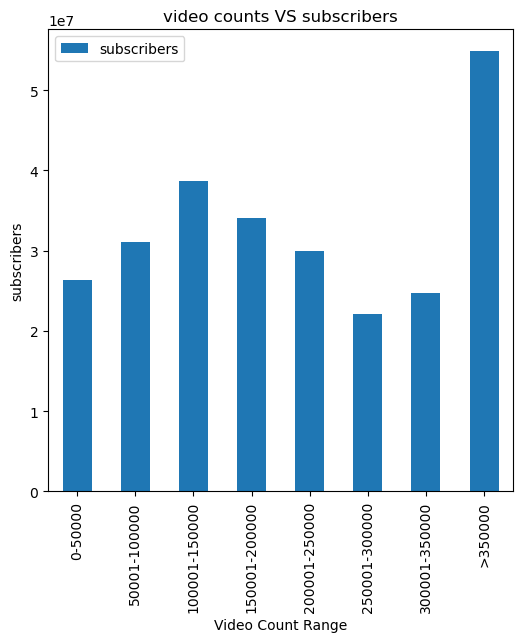

In [63]:
vid_count_visual1.plot(kind='bar',x='Video Count Range',y='subscribers',ylabel="subscribers",title='video counts VS subscribers',figsize=(6, 6))

<Axes: title={'center': 'video counts VS video views'}, xlabel='Video Count Range', ylabel='video views'>

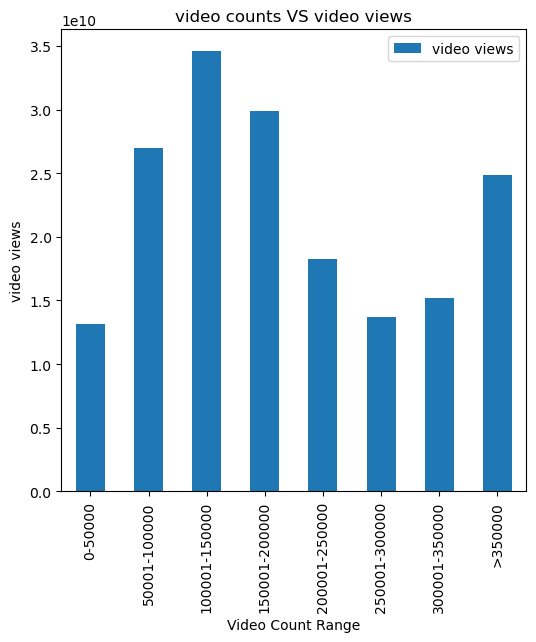

In [64]:
vid_count_visual2.plot(kind='bar',x='Video Count Range',y='video views',ylabel="video views",title="video counts VS video views",figsize=(6, 6))

I noticed that the number of views and subscribers does not necessarily depend on the number of videos a YouTuber uploads. For example, there are YouTubers who have uploaded videos in the range of '100,001-150,000' but have more subscribers and views than YouTubers who have uploaded videos in the range of '250,001-300,000'.

**Research question(2):** What is the average (views) for different categories?

In [65]:
#Visual 2 - FILL IN
# Grouping by 'category' and calculating the mean of 'video views'
average_views_by_category = dataset1_copy.groupby('category',as_index=False)['video views'].mean() 
# Sorting the results by 'video views' in ascending order
average_views_by_category=average_views_by_category.sort_values('video views')


<Axes: title={'center': 'category VS video views'}, xlabel='category', ylabel='video views'>

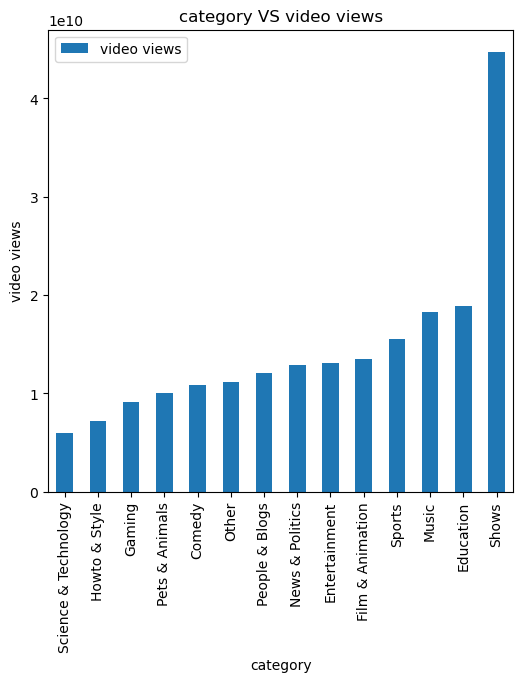

In [66]:
average_views_by_category.plot(kind='bar',x='category',y='video views',ylabel="video views",title="category VS video views",figsize=(6, 6))

It appears that the content that attracts people on YouTube includes shows, educational content, music and songs, and sports.

* ### Answer the research question using tiktok dataset

**Research question(3):** Which countries have the highest number of top-ranked influencers?

In [67]:
# Grouping by 'Country' and counting the number of top-ranked influencers
top_countries = dataset2_copy.groupby('Country',as_index=False)['rank'].count()

# Sorting in descending order based on the count of influencers
top_countries = top_countries.sort_values(by='rank', ascending=False) 
top_countries.drop(top_countries[top_countries['Country'] == 'Unknown'].index, inplace=True)

<Axes: title={'center': 'category VS tiktokers'}, xlabel='Country', ylabel='top ranked tiktokers'>

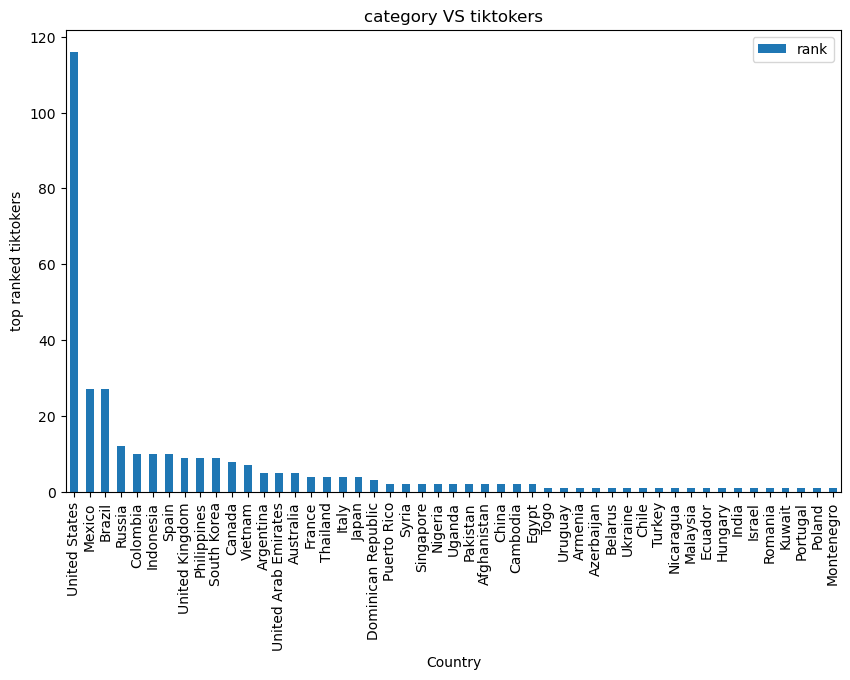

In [68]:
top_countries.plot(kind='bar',x='Country',y='rank',ylabel="top ranked tiktokers",title="category VS tiktokers",figsize=(10, 6))

TikTok influencers from the United States have the highest number of followers, making the U.S. a dominant country for top-ranked TikTok influencers.

**Research question(4):** Which topics of influence are most popular among influencers?

In [69]:
topic_counts = dataset2_copy['Topic of Influence'].value_counts().reset_index()
topic_counts.columns = ['Topic of Influence', 'Count'] 
topic_counts.drop(topic_counts[topic_counts['Topic of Influence'] == 'Unknown'].index, inplace=True)
topic_counts.head(10)

Topic of Influence  Count
1       Entertainment    330
2              Beauty     73
3           Education     20
4              Family     17
5              Gaming     16
6      Pets & Animals     16
7                Food     15
8     Arts and Crafts     15
9    Acting and Drama     13
10             Sports     13

Overall, the data highlights that entertainment, beauty, and education are the most prominent topics among TikTok influencers, suggesting a strong audience interest in these areas.

* ### Answer the research question using combined dataset

**Research question(5):** Which category has the highest average followers across both platforms?

In [70]:
avg_followers_by_category = combined_dataset.groupby('Category',as_index=False)['Followers'].mean()

# Find the category with the highest average followers
max_avg_followers_category = avg_followers_by_category.loc[avg_followers_by_category['Followers'].idxmax()] 
print(f"category has the highest average followers across both platforms is {max_avg_followers_category}")

category has the highest average followers across both platforms is Category               Shows
Followers    52154545.454545
Name: 30, dtype: object


the category with the highest average followers across both YouTube and TikTok platforms is "Shows," with an average of 52,154,545 followers. This indicates that content categorized under "Shows" attracts a significantly larger audience compared to other categories.

**Research question(6):**  Who are the top 10 influencers by follower count?<br>

In [71]:
# Find top 10 influencers regardless of platform
top_10_influencers = combined_dataset.nlargest(10, 'Followers')[['Influencer','platform']]
top_10_influencers

Influencer platform
0                     MrBeast  YouTube
1                    T-Series  YouTube
2  Cocomelon - Nursery Rhymes  YouTube
3                   SET India  YouTube
4                 @khaby.lame   TikTok
5         â¿ Kids Diana Show  YouTube
6               Vlad and Niki  YouTube
7                 Like Nastya  YouTube
8                   PewDiePie  YouTube
9           Zee Music Company  YouTube

The analysis shows that YouTube dominates the top influencers list, with names like MrBeast, T-Series, and PewDiePie leading. Out of the top ten, nine are from YouTube, highlighting its significant influence. Only one, khaby lame, represents TikTok, indicating fewer top-ranked influencers on TikTok compared to YouTube.

**Research question(7):**  Are there any influencers who appear in the top ranks on both platforms?

In [72]:
youtube_top = combined_dataset.loc[combined_dataset['platform'] == 'YouTube', 'Influencer'].str.replace(' ', '')

tiktok_top = combined_dataset.loc[combined_dataset['platform'] == 'TikTok', 'Influencer'].str.replace('@', '')
top_influencers_both_platforms = pn.merge(youtube_top, tiktok_top, on='Influencer')
top_influencers_both_platforms

Influencer
0       _vector_
1  scottsreality

If the cleaned influencer names match across both platforms, they will be printed as common influencers.







## Findings:

* Influence of Content Over Quantity:
> The number of views and subscribers a YouTuber has is not necessarily tied to the number of videos they upload. Quality and type of content play a more crucial role in attracting an audience.

* fewer top-ranked influencers on TikTok compared to YouTube.

>  1. YouTube supports a wide array of content categories, appealing to diverse audience interests, whereas TikTok's focus on short, trend-driven content may limit its scope.
> 2. YouTube provides established monetization avenues like ad revenue, sponsorships, memberships, and merchandise sales, which attract creators seeking sustainable income.
> 3. TikTok's short-form video format (typically a few seconds to a minute) may hinder influencers in building sustained engagement and loyal audiences compared to YouTube's longer-form content.
* Cross-Platform Influencers:

> There is potential for influencers to have a strong presence on both YouTube and TikTok. By cleaning and matching influencer names across both platforms, any common influencers can be identified, showing those who have successfully built a top-ranked presence on multiple platforms.

*  Across both YouTube and TikTok, the category with the highest average followers is "Shows," with an average of 52,154,545 followers. This suggests that show-based content is highly attractive to audiences on both platforms.

### **5.2:** Reflection
If I had more time, I would explore additional social media platforms like Instagram, Snapchat, and Twitter to gain a comprehensive understanding of influencer dynamics across diverse demographics and content types. I would also delve deeper into addressing any remaining data quality issues, such as standardizing influencer names across platforms and verifying data consistency